In [15]:
from tensorboard.backend.event_processing import event_accumulator
from collections import  namedtuple
import numpy as np
import pickle
import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple
from matplotlib import pyplot as plt
def plot_episode_stats(stats, smoothing_window=10, noshow=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)
    return fig1, fig2

In [16]:
import os
names = os.listdir('da')


In [17]:
name = names[0]
final = []
for name in names:
    with open('da/' + name,'rb') as f:
        res = pickle.load(f)
    reward = res['reward']
    episode_length = res['episode_length']
    EpisodeStats = namedtuple("Stats",["episode_lengths", "episode_rewards"])
    stats = EpisodeStats(
        episode_lengths=np.zeros(len(reward)),
         episode_rewards=np.zeros(len(reward)))
    for t in range(len(reward)):
        stats.episode_lengths[t] = episode_length[t][2]
        stats.episode_rewards[t] = reward[t][2]
    
    info = {'name':name,'length':len(reward),'data':stats}
    final.append(info)

In [18]:
length = max([info['length'] for info in final])

In [19]:
def plot_compare_rewards(stats, smoothing_window=10, noshow=False, env = 'Torch'):
    # Plot the episode reward over time
    fig = plt.figure(figsize=(20,10))
    for s in stats:
        if env in s['name']:
            rewards_smoothed = pd.Series(s['data'].episode_rewards[:length]).rolling(smoothing_window, min_periods=smoothing_window).mean()
            plt.plot(rewards_smoothed,label = s['name'],alpha = 0.8)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title(env + " Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    plt.legend()
    return fig

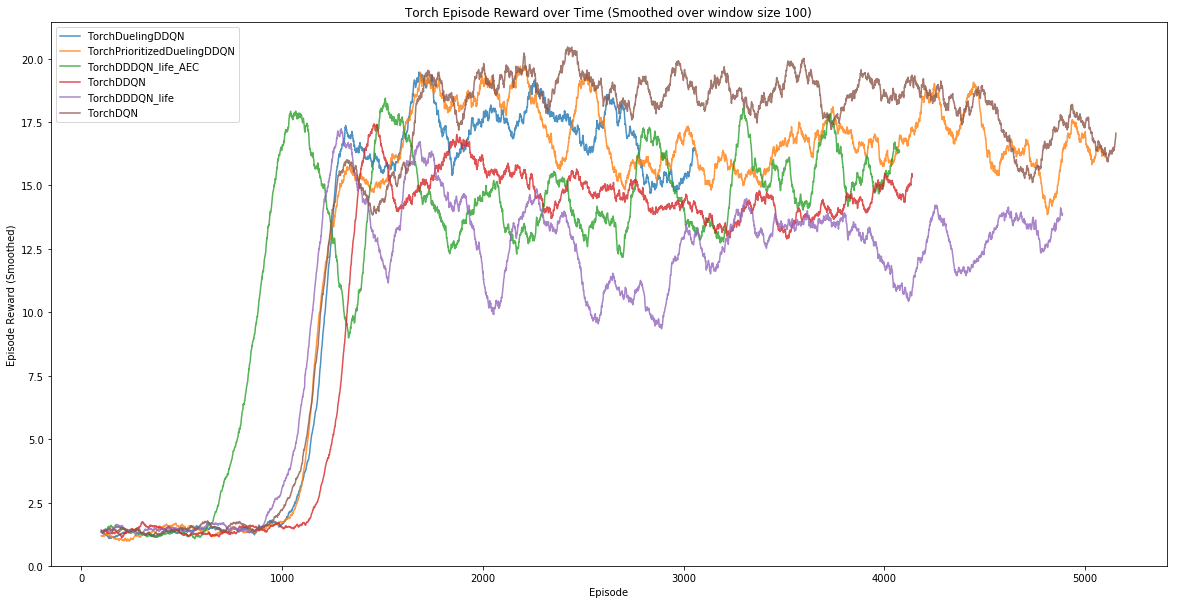

In [20]:
fig = plot_compare_rewards(final, smoothing_window=100, env= 'Torch')

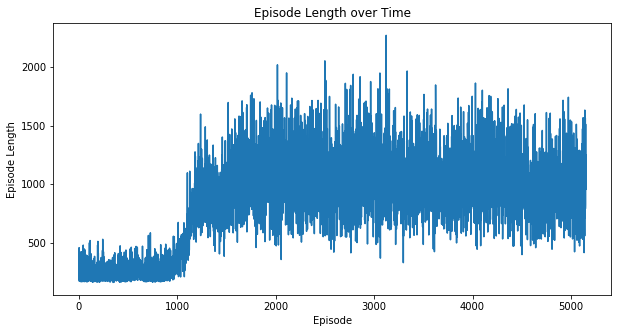

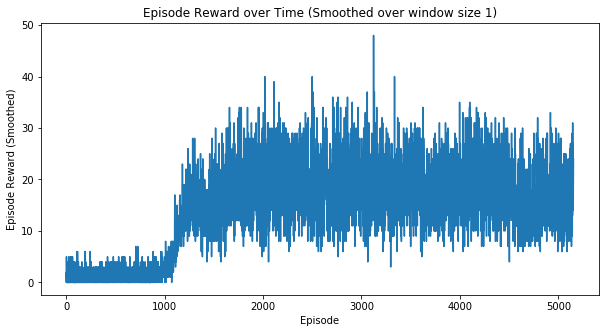

(<Figure size 720x360 with 1 Axes>, <Figure size 720x360 with 1 Axes>)

In [23]:
plot_episode_stats(stats,1)